In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/umap/dist

scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.6 louvain==0.8.1 pynndescent==0.5.10


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


Reading in and verifying adata

In [2]:
adata = sc.read_h5ad("/home/timliu/Projects/aging_mice/data/aged_new_celltypes.h5ad")

/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata.raw = adata

In [4]:
adata.obs

,cond,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,...,leiden_res0.1,leiden_res0.15,leiden_res0.2,leiden_res0.25,leiden_res0.375,leiden_res0.5,leiden_res0.75,leiden_res1.0,ct,cell_type
AAACCCAAGAAGTCCG-1,aged_naive,2206,7.699389,6788.0,8.823059,21.670595,237.0,5.472270,3.491456,0.0,...,0,0,0,0,1,0,0,5,M2 macrophage,Macrophages
AAACCCAAGATTGCGG-1,aged_naive,2600,7.863651,7295.0,8.895082,13.927347,98.0,4.595120,1.343386,0.0,...,0,0,0,0,1,0,0,2,M2 macrophage,Macrophages
AAACCCAAGCATCAAA-1,aged_naive,495,6.206576,888.0,6.790097,21.959459,3.0,1.386294,0.337838,0.0,...,0,6,3,3,5,4,16,17,M2 macrophage,Macrophages
AAACCCAAGCTCAGAG-1,aged_naive,3733,8.225235,13942.0,9.542733,16.468226,204.0,5.323010,1.463205,0.0,...,0,0,0,0,1,0,0,5,M2 macrophage,Macrophages
AAACCCACACTGCACG-1,aged_naive,4934,8.504108,25207.0,10.134916,23.719602,1545.0,7.343426,6.129250,0.0,...,1,1,1,1,0,3,3,1,Myoepithelial cell,Cancer cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTCGATTG-1,young_naive,1340,7.201171,2654.0,7.884200,17.709118,34.0,3.555348,1.281085,0.0,...,0,3,4,4,4,8,9,12,M2 macrophage,DC
TTTGTTGTCACACCGG-1,young_naive,4900,8.497195,18891.0,9.846494,13.800222,665.0,6.501290,3.520195,0.0,...,1,1,1,1,0,2,2,0,Myoepithelial cell,Cancer cells
TTTGTTGTCGGTAAGG-1,young_naive,1524,7.329750,2954.0,7.991254,13.981043,122.0,4.812184,4.129993,0.0,...,3,3,4,4,4,7,5,7,Dendritic cell,DC
TTTGTTGTCTGGTGGC-1,young_naive,5574,8.626048,25069.0,10.129427,13.889665,1353.0,7.210818,5.397104,0.0,...,1,1,1,1,0,3,3,1,Myoepithelial cell,Cancer cells


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.p

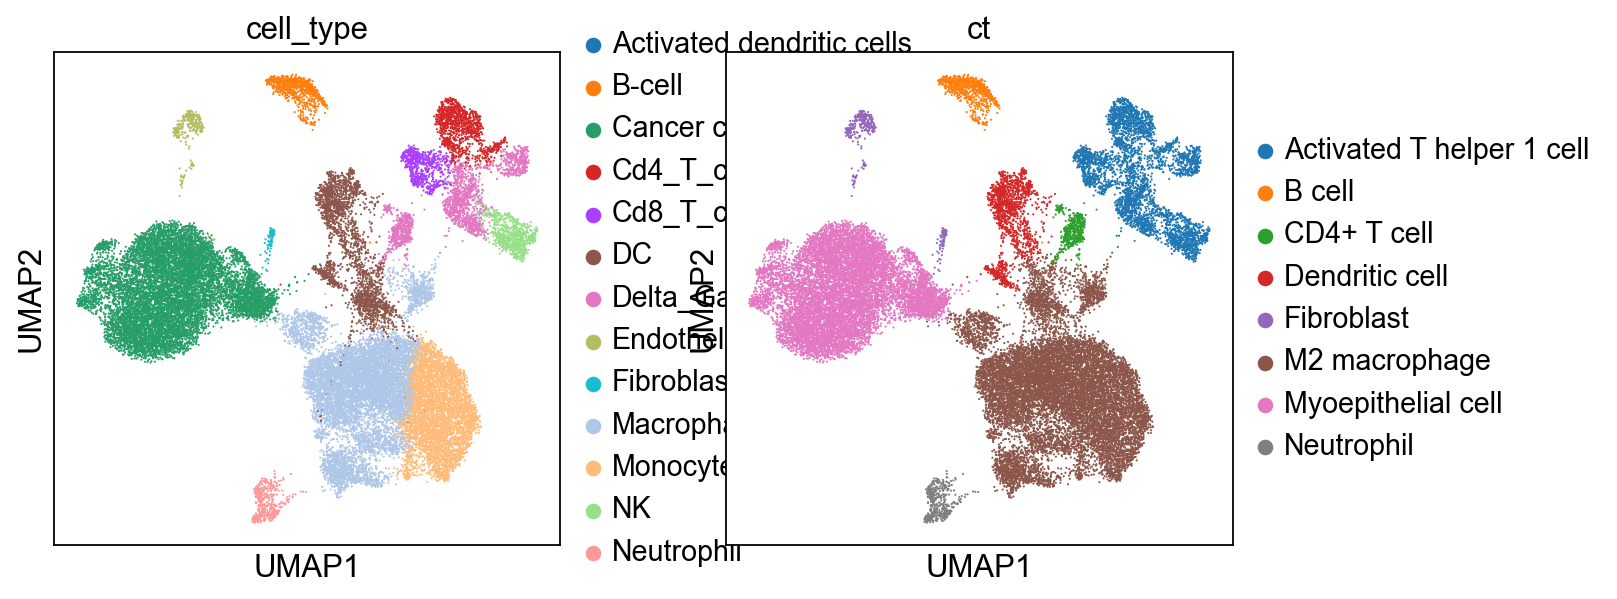

In [5]:
sc.pl.umap(adata, color = ["cell_type","ct"])

Identifying interactions of interest and prepping adata for LIANA

In [6]:
adata.obs["ct"].unique().tolist()

['M2 macrophage',
 'Myoepithelial cell',
 'Activated T helper 1 cell',
 'Dendritic cell',
 'Neutrophil',
 'CD4+ T cell',
 'B cell',
 'Fibroblast']

In [7]:
#Filter to T cells and Macrophages
def categorize_cell(cell_type):
    if cell_type == 'Activated T helper 1 cell':
        return 'T Cells'
    if cell_type == 'CD4+ T cell':
        return 'T Cells'
    if cell_type == 'M2 macrophage':
        return 'M2 macrophage'
    else:
        return 'Neither'

In [8]:
#Interactions of interest
cells_of_interest = ['T Cells','M2 macrophage']

In [9]:
# Apply the function to create a new obs
adata.obs['cell_category'] = adata.obs['ct'].apply(categorize_cell)

In [10]:
adata.obs

,cond,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,...,leiden_res0.15,leiden_res0.2,leiden_res0.25,leiden_res0.375,leiden_res0.5,leiden_res0.75,leiden_res1.0,ct,cell_type,cell_category
AAACCCAAGAAGTCCG-1,aged_naive,2206,7.699389,6788.0,8.823059,21.670595,237.0,5.472270,3.491456,0.0,...,0,0,0,1,0,0,5,M2 macrophage,Macrophages,M2 macrophage
AAACCCAAGATTGCGG-1,aged_naive,2600,7.863651,7295.0,8.895082,13.927347,98.0,4.595120,1.343386,0.0,...,0,0,0,1,0,0,2,M2 macrophage,Macrophages,M2 macrophage
AAACCCAAGCATCAAA-1,aged_naive,495,6.206576,888.0,6.790097,21.959459,3.0,1.386294,0.337838,0.0,...,6,3,3,5,4,16,17,M2 macrophage,Macrophages,M2 macrophage
AAACCCAAGCTCAGAG-1,aged_naive,3733,8.225235,13942.0,9.542733,16.468226,204.0,5.323010,1.463205,0.0,...,0,0,0,1,0,0,5,M2 macrophage,Macrophages,M2 macrophage
AAACCCACACTGCACG-1,aged_naive,4934,8.504108,25207.0,10.134916,23.719602,1545.0,7.343426,6.129250,0.0,...,1,1,1,0,3,3,1,Myoepithelial cell,Cancer cells,Neither
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTCGATTG-1,young_naive,1340,7.201171,2654.0,7.884200,17.709118,34.0,3.555348,1.281085,0.0,...,3,4,4,4,8,9,12,M2 macrophage,DC,M2 macrophage
TTTGTTGTCACACCGG-1,young_naive,4900,8.497195,18891.0,9.846494,13.800222,665.0,6.501290,3.520195,0.0,...,1,1,1,0,2,2,0,Myoepithelial cell,Cancer cells,Neither
TTTGTTGTCGGTAAGG-1,young_naive,1524,7.329750,2954.0,7.991254,13.981043,122.0,4.812184,4.129993,0.0,...,3,4,4,4,7,5,7,Dendritic cell,DC,Neither
TTTGTTGTCTGGTGGC-1,young_naive,5574,8.626048,25069.0,10.129427,13.889665,1353.0,7.210818,5.397104,0.0,...,1,1,1,0,3,3,1,Myoepithelial cell,Cancer cells,Neither


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.p

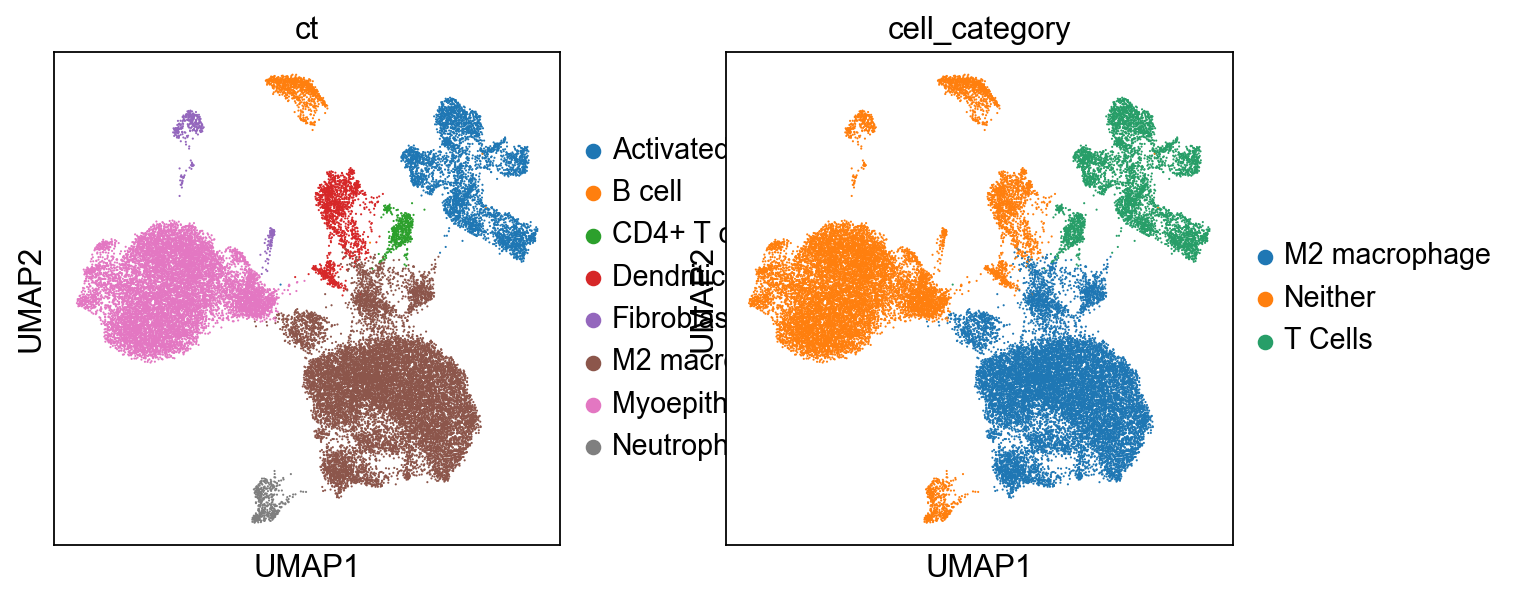

In [11]:
sc.pl.umap(adata, color = ["ct","cell_category"])

In [12]:
#Split adata into young and aged
young_adata = adata[adata.obs["cond"] == "young_naive"]
aged_adata = adata[adata.obs["cond"] == "aged_naive"]

/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [13]:
young_adata

View of AnnData object with n_obs × n_vars = 19169 × 32285
    obs: 'cond', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'doublet_score', 'predicted_doublets', 'leiden_res0.05', 'leiden_res0.1', 'leiden_res0.15', 'leiden_res0.2', 'leiden_res0.25', 'leiden_res0.375', 'leiden_res0.5', 'leiden_res0.75', 'leiden_res1.0', 'ct', 'cell_type', 'cell_category'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'cond_colors', 'ct_colors', 'hvg', 'leiden', 'leiden_res0.05_colors', 'leiden_res0.15_colors', 'leiden_res0.1_colors', 'leiden_res0.25_colors', 'leiden_res0.2_colors', 'leiden_res0.375_colors', 'leiden_res0.5_colors', 'leiden_res0.75_colors', 'leiden_res1.0_colors', 'neighbo

Implementing LIANA - Rank Aggregate Used

In [14]:
import liana as li
from liana.mt import rank_aggregate

In [15]:
?rank_aggregate.__call__

Results on Young

In [16]:
young_adata.raw.X

<19169x32285 sparse matrix of type '<class 'numpy.float32'>'
	with 49176683 stored elements in Compressed Sparse Row format>

In [17]:
#Run rank aggregate
li.mt.rank_aggregate(young_adata, groupby='cell_category', expr_prop=0.1, verbose=True, resource_name = 'mouseconsensus')

Using `.raw`!
6583 features of mat are empty, they will be removed.
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/pandas/core/indexing.py:1819: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/liana/method/_pipe_utils/_pre.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

Generating ligand-receptor stats for 19169 samples and 25702 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Assuming that counts were `natural` log-normalized!


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/annda

Running CellPhoneDB


100%|██████████| 1000/1000 [00:29<00:00, 33.36it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 1000/1000 [10:10<00:00,  1.64it/s]
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/liana/method/sc/_rank_aggregate.py:144: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future 

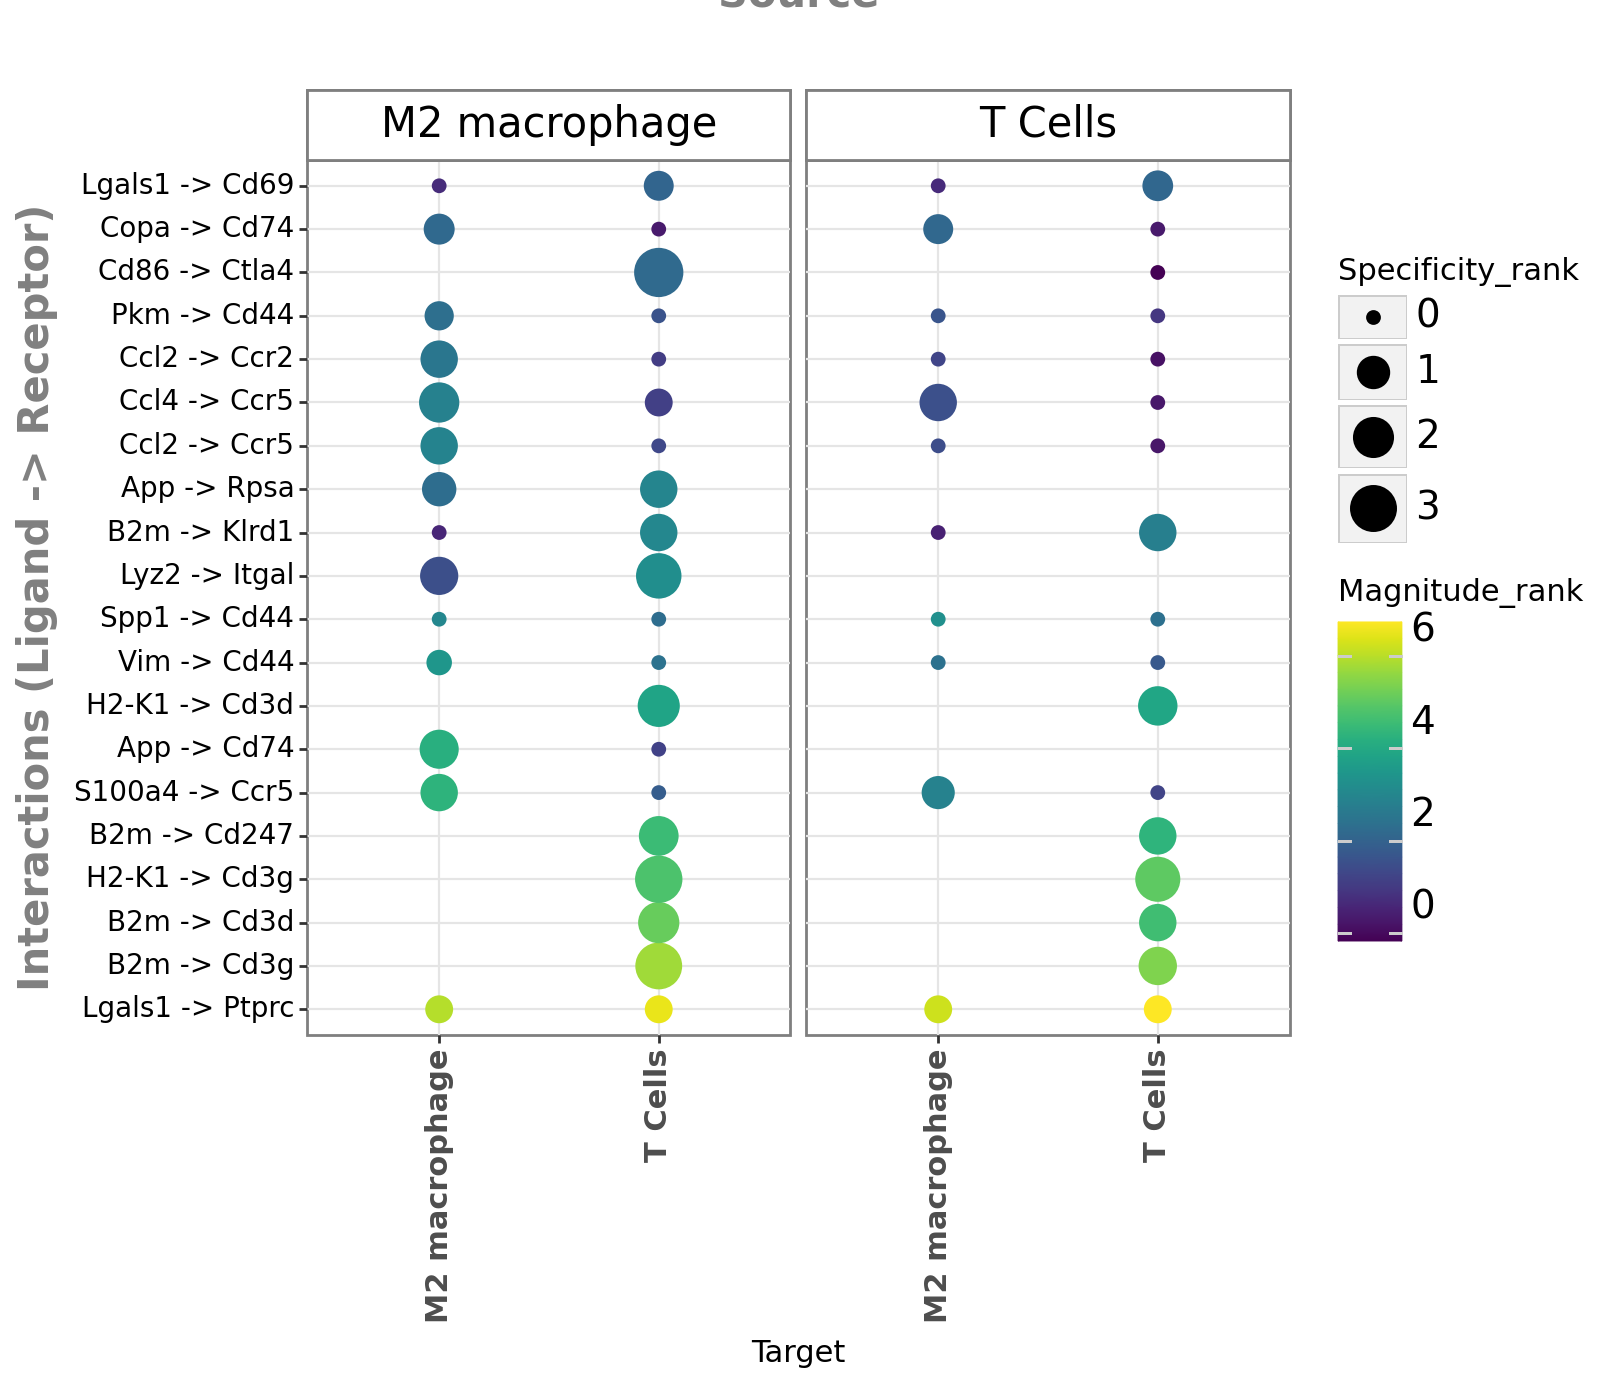

<Figure Size: (800 x 700)>

In [18]:
# Dotplot

young_dp = li.pl.dotplot(adata = young_adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels= cells_of_interest,
              target_labels= cells_of_interest,
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )
young_dp

In [19]:
young_dp.save("/home/timliu/Projects/aging_mice/plots/young_LIANA_T_macro_results")

/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 7 in image.
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/timliu/Projects/aging_mice/plots/young_LIANA_T_macro_results
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/mini

In [20]:
young_adata.uns['liana_res'].head()

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
1733,Neither,T Cells,Lgals1,Ptprc,2.413168,0.0,5.816885,0.514592,0.834202,0.176677,0.966192,0.204988,0.0,0.194178,6.936891e-09
401,Neither,M2 macrophage,Lgals1,Ptprc,2.340760,0.0,5.455748,0.455326,0.847585,0.165709,0.965129,0.197266,0.0,0.254253,5.946517e-08
1893,T Cells,T Cells,Lgals1,Ptprc,2.228237,0.0,4.954152,0.315303,0.457018,0.150473,0.963470,0.177982,0.0,0.318851,2.750882e-07
1525,M2 macrophage,T Cells,Lgals1,Ptprc,2.241985,0.0,5.018290,0.330119,0.310092,0.152422,0.963695,0.176915,0.0,0.318851,4.432044e-07
574,T Cells,M2 macrophage,Lgals1,Ptprc,2.155828,0.0,4.646576,0.256037,0.470401,0.141131,0.962325,0.171058,0.0,0.318851,8.651411e-07


In [21]:
# Save results
#sc.write('/home/timliu/Projects/aging_mice/data/young_subset', young_adata)

Results on Aged

In [22]:
aged_adata.raw.X

<13381x32285 sparse matrix of type '<class 'numpy.float32'>'
	with 33311727 stored elements in Compressed Sparse Row format>

In [23]:
li.mt.rank_aggregate(aged_adata, groupby='cell_category', expr_prop=0.1, verbose=True, resource_name = 'mouseconsensus')

Using `.raw`!
7489 features of mat are empty, they will be removed.
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/pandas/core/indexing.py:1819: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/liana/method/_pipe_utils/_pre.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

Generating ligand-receptor stats for 13381 samples and 24796 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Assuming that counts were `natural` log-normalized!


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/annda

Running CellPhoneDB


100%|██████████| 1000/1000 [00:15<00:00, 64.92it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 1000/1000 [07:32<00:00,  2.21it/s]
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/liana/method/sc/_rank_aggregate.py:144: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future 

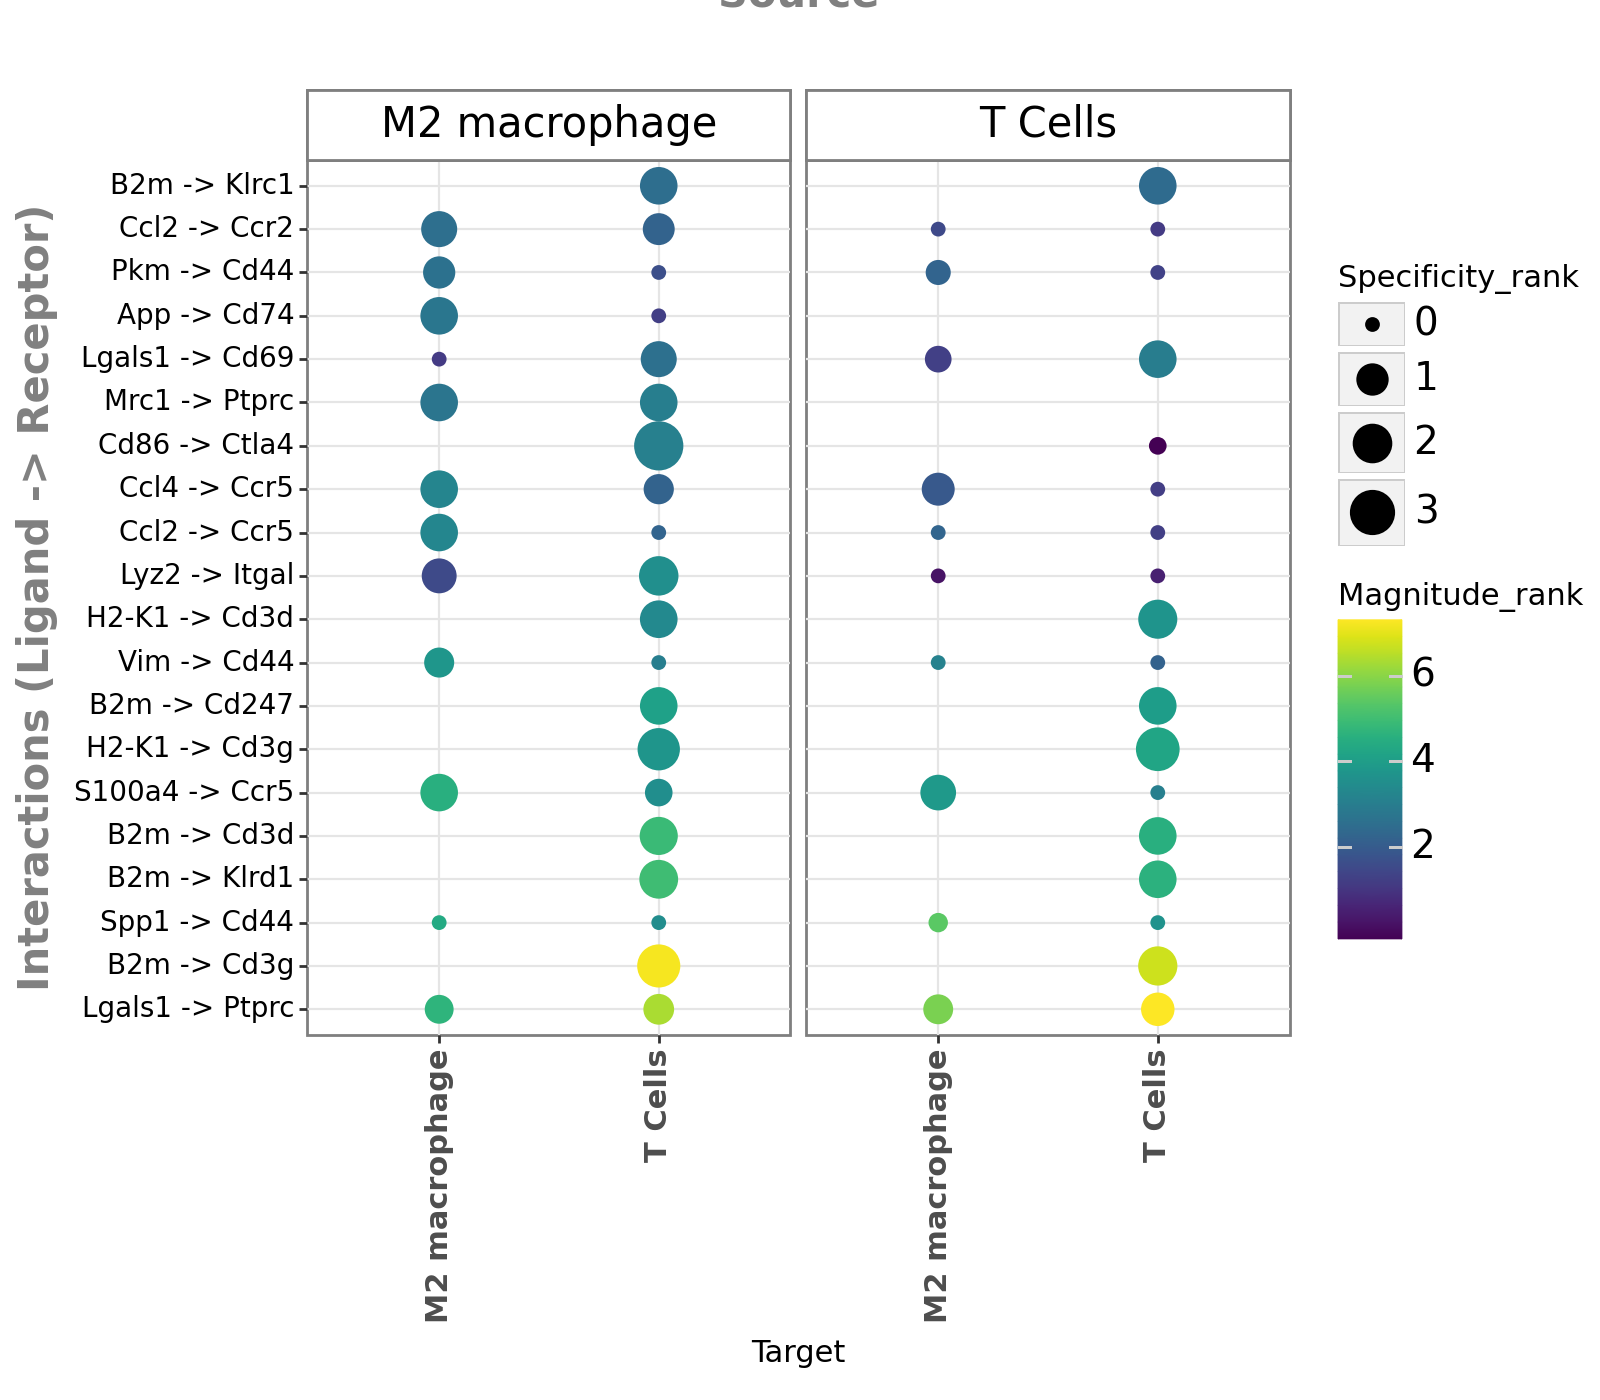

<Figure Size: (800 x 700)>

In [24]:
# Old
aged_dp = li.pl.dotplot(adata = aged_adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels= cells_of_interest,
              target_labels= cells_of_interest,
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )
aged_dp

In [25]:
aged_dp.save("/home/timliu/Projects/aging_mice/plots/aged_LIANA_T_macro_results")

/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 7 in image.
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/timliu/Projects/aging_mice/plots/aged_LIANA_T_macro_results
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/miniconda3/envs/liana/lib/python3.9/site-packages/plotnine/utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/timliu/minic

In [26]:
aged_adata.uns['liana_res'].head()

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
277,Neither,M2 macrophage,Spp1,Cd44,2.631031,0.0,5.931208,0.522225,1.436596,0.191317,0.966774,0.184495,0.0,0.065737,3.518431e-09
2332,T Cells,T Cells,Lgals1,Ptprc,2.336638,0.0,5.312491,0.576002,0.753625,0.186969,0.964959,0.164309,0.0,0.073612,7.491362e-08
1767,M2 macrophage,T Cells,B2m,Cd3g,2.381682,0.0,4.677577,1.170024,1.797251,0.350656,0.962742,0.152806,0.0,0.002494,9.491156e-08
2292,T Cells,T Cells,B2m,Cd3g,2.269454,0.0,4.366870,1.016521,1.411784,0.327364,0.961490,0.144591,0.0,0.011617,2.526746e-07
1827,M2 macrophage,T Cells,Lgals1,Ptprc,2.193767,0.0,4.535111,0.434648,0.483443,0.159610,0.962183,0.143744,0.0,0.149190,5.985557e-07


In [27]:
#sc.write('/home/timliu/Projects/aging_mice/data/aged_subset', aged_adata)